In [36]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd


# Reproducibility so the results stay the same every time ran
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seed(420)

In [37]:
# Train and set sets
train_ = image_dataset_from_directory(
    './pizza_not_pizza/train',
    labels='inferred',
    label_mode='binary',
    image_size=[299, 299],
    interpolation='nearest',
    batch_size=64,
    shuffle=True
)

test_ = image_dataset_from_directory(
    './pizza_not_pizza/test',
    labels='inferred',
    label_mode='binary',
    image_size=[299, 299],
    interpolation='nearest',
    batch_size=64,
    shuffle=True
)

def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
train = train_.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE)
test = test_.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE)

#train = tf.keras.applications.vgg16.preprocess_input(train_)
#test = tf.keras.applications.vgg16.preprocess_input(test_)

Found 1291 files belonging to 2 classes.
Found 675 files belonging to 2 classes.


In [38]:
pretrained_base = tf.keras.applications.InceptionV3(include_top=True)
pretrained_base.trainable = False

In [39]:
model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [40]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(train, validation_data=test, epochs=30)

Epoch 1/30


2022-09-12 10:26:09.775006: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 68659968 exceeds 10% of free system memory.
2022-09-12 10:26:09.926890: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 181870592 exceeds 10% of free system memory.
2022-09-12 10:26:10.024025: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 68659968 exceeds 10% of free system memory.
2022-09-12 10:26:10.387522: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 68659968 exceeds 10% of free system memory.
2022-09-12 10:26:10.573176: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 68659968 exceeds 10% of free system memory.


21/21 [==============================] - 124s 6s/step - loss: 0.6767 - binary_accuracy: 0.7010 - val_loss: 0.6698 - val_binary_accuracy: 0.6800
Epoch 2/30
21/21 [==============================] - 118s 6s/step - loss: 0.6603 - binary_accuracy: 0.7374 - val_loss: 0.6544 - val_binary_accuracy: 0.7570
Epoch 3/30
21/21 [==============================] - 120s 6s/step - loss: 0.6430 - binary_accuracy: 0.8164 - val_loss: 0.6360 - val_binary_accuracy: 0.8785
Epoch 4/30
21/21 [==============================] - 127s 6s/step - loss: 0.6233 - binary_accuracy: 0.9047 - val_loss: 0.6156 - val_binary_accuracy: 0.9274
Epoch 5/30
21/21 [==============================] - 141s 7s/step - loss: 0.6019 - binary_accuracy: 0.9357 - val_loss: 0.5937 - val_binary_accuracy: 0.9496
Epoch 6/30
21/21 [==============================] - 123s 6s/step - loss: 0.5793 - binary_accuracy: 0.9458 - val_loss: 0.5707 - val_binary_accuracy: 0.9511
Epoch 7/30
21/21 [==============================] - 122s 6s/step - loss: 0.5559 -

Text(0.5, 0, 'epoch')

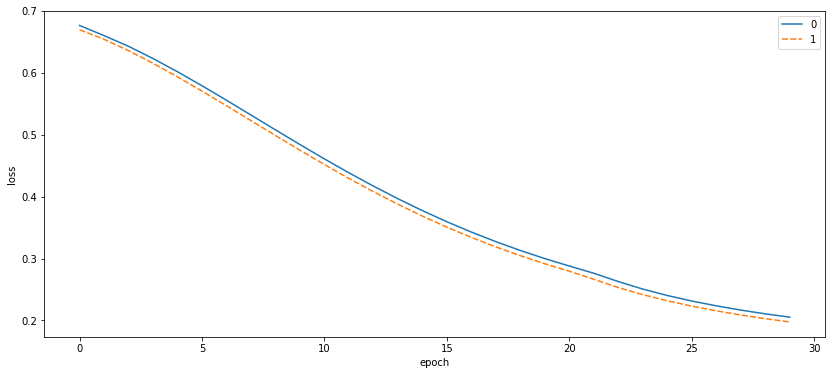

In [42]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=(history.history['loss'], history.history['val_loss']))
plt.ylabel('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

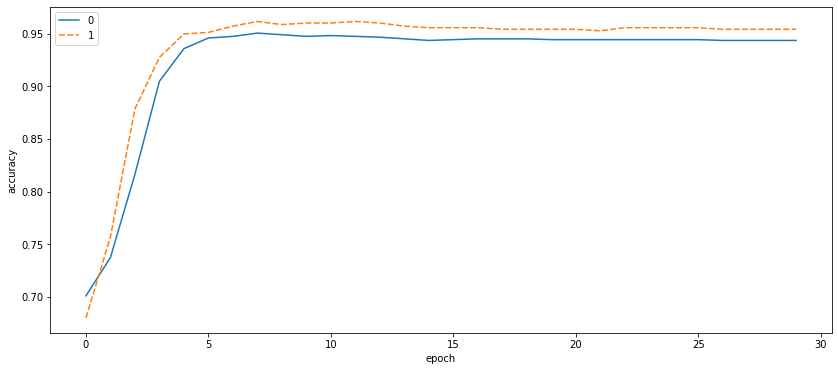

In [44]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=(history.history['binary_accuracy'], history.history['val_binary_accuracy']))
plt.ylabel('accuracy')
plt.xlabel('epoch')